In [1]:
import numpy as np
import os
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 16)

In [2]:
sim = 12
simdir = "sim{:03d}".format(sim)
paramdir = "16151_450_10_800_30_150_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02"
srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
whichfile = "permnull_sb0.1_nomask_knn/raw/peer0/rr.txt"
rrfile = os.path.join(srcdir, 'tejaas', whichfile)
rrfile_rand = os.path.join(srcdir, 'tejaas_rand', whichfile)


def read_tejaas(filename):
    pvallist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            pvallist.append(float(linesplit[5]))
    return np.array(pvallist)

pvals = read_tejaas(rrfile)
pvals_rand = read_tejaas(rrfile_rand)

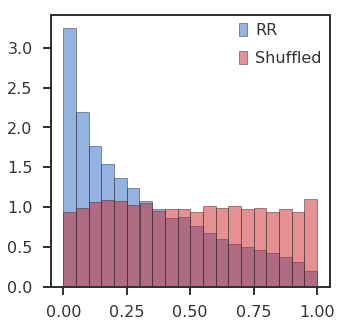

In [3]:
fig = plt.figure(figsize = (5, 5))
ax1 = fig.add_subplot(111)
ax1.hist(pvals, alpha = 0.5, density = True, label = 'RR')
ax1.hist(pvals_rand, alpha = 0.5, density = True, label = 'Shuffled')
ax1.legend()
plt.show()

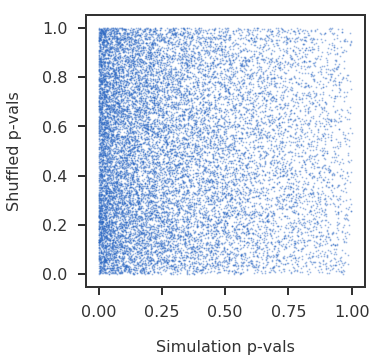

In [4]:
fig = plt.figure(figsize = (5, 5))
ax1 = fig.add_subplot(111)
#ax1.scatter(-np.log10(pvals), -np.log10(pvals_rand), s=1, alpha = 0.3)
ax1.scatter(pvals, pvals_rand, s=1, alpha=0.3)
ax1.set_ylabel("Shuffled p-vals")
ax1.set_xlabel("Simulation p-vals")
plt.show()